<div style="direction: rtl; text-align: right; font-family: Vazirmatn, sans-serif;">
  <h1>تمرین پیش‌پردازش داده‌ها – گروه دوم - دانشجویان دوره آنلاین</h1>
  <br>
  <h2>انجام دهنده: محمدرضا حسن زاده</h2>
  <br>
</div>

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1> 
<h2>مقدمه</h2>

در این تمرین، داده‌های رفتاری کاربران پلتفرم آموزش آنلاین را پردازش کرده و آماده تحلیل می‌کنید.
 
 هر وظیفه شامل دو بخش کد و سوال تشریحی میباشد

 بعد از نوشتن کد برای پاسخ به بخش تشریحی متن پاسخ خودتون رو در آخر کد به صورت کامنت شده بنویسید 

<br>
</div>

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1>
<h2>فایل ورودی</h2>

شما باید فایل `online_students.csv` را بارگذاری کرده و مراحل زیر را روی آن انجام دهید.
<br>
</div>

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1>
<h2>وظایف</h2>

<br>
</div>

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h3>وظیفه 0:</h3>

وارد کردن کتابخانه های مورد نیاز و فایل دیتاست
<br>
</div>

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('online_students.csv')

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          500 non-null    object 
 1   CourseName         500 non-null    object 
 2   TotalTimeSpent     500 non-null    float64
 3   QuizzesAttempted   500 non-null    int64  
 4   ForumPosts         500 non-null    int64  
 5   AssignmentScore    485 non-null    float64
 6   CertificateEarned  500 non-null    object 
 7   DeviceType         500 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


In [323]:
df.drop(['StudentID'], axis=1, inplace=True, errors='ignore')

print(df['CourseName'].value_counts().to_dict())
print(df['CertificateEarned'].value_counts().to_dict())
print(df['DeviceType'].value_counts().to_dict())

df['CourseName'] = df['CourseName'].astype('category')
df['CertificateEarned'] = df['CertificateEarned'].astype('category')
df['DeviceType'] = df['DeviceType'].astype('category')

df.info()

{'ML Basics': 132, 'DL Advanced': 129, 'Data Prep': 126, 'AI Ethics': 113}
{'No': 296, 'Yes': 204}
{'Tablet': 177, 'Mobile': 168, 'Desktop': 155}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CourseName         500 non-null    category
 1   TotalTimeSpent     500 non-null    float64 
 2   QuizzesAttempted   500 non-null    int64   
 3   ForumPosts         500 non-null    int64   
 4   AssignmentScore    485 non-null    float64 
 5   CertificateEarned  500 non-null    category
 6   DeviceType         500 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 17.7 KB


In [324]:
df.head()

,CourseName,TotalTimeSpent,QuizzesAttempted,ForumPosts,AssignmentScore,CertificateEarned,DeviceType
0,Data Prep,93.0,2,7,86.2,Yes,Mobile
1,ML Basics,78.2,7,3,83.9,No,Mobile
2,ML Basics,64.0,5,2,65.3,Yes,Mobile
3,Data Prep,21.7,5,6,50.2,No,Mobile
4,Data Prep,56.3,5,5,72.1,Yes,Mobile


<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h3>وظیفه 1:</h3>

بررسی و تحلیل داده‌های گمشده (Missing Values) و اعمال روش مناسب برای هندل کردن هر ستون.

1- داده ها گمشده در چه ستون هایی قرار دارند؟؟ 

2- دلیل انتخاب روشی که اعمال کردین؟؟
<br>
</div>

In [325]:
missing_counts = df.isnull().sum()
missing_df = missing_counts[missing_counts > 0]
print(missing_df)
null_index = df[df.isnull().any(axis=1)].index.tolist()
print(null_index)

AssignmentScore    15
dtype: int64
[44, 93, 100, 104, 138, 147, 190, 235, 249, 320, 325, 354, 395, 445, 473]


In [326]:
df.dropna(inplace=True)

<div dir="rtl" style=" border-right: 4px solid #0d6efd; padding: 16px; margin-top: 16px; font-family: Vazirmatn, sans-serif;">
  <h4 style="margin-top: 0;">تصمیم‌گیری: مدیریت داده‌های گمشده در ستون `AssignmentScore`</h4>
  <hr>
  <blockquote style="margin: 0; padding-right: 12px; border-right: 2px solid #ced4da;">
    <p>
      از آنجایی که از کل <strong>۵۰۰ داده</strong>، تنها <strong>۱۵ داده</strong> در ستون <code>AssignmentScore</code> مشکل داشتند، این تعداد برای تأثیرگذاری بر نتیجه نهایی قابل توجه نیست. برخورد با این مقادیر از طریق جایگزینی با میانگین یا میانه، منجر به تولید <strong>داده‌های مصنوعی</strong> و غیرواقعی می‌شد که ضرر آن می‌توانست بیشتر از حذف این چند سطر باشد.
    </p>
    <p>
      بنابراین، منطقی‌ترین و امن‌ترین راه، حذف کامل این سطرها بود.
    </p>
  </blockquote>
 

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1>
<h2></h2>
<h3>وظیفه 2:</h3>

تشخیص داده‌های پرت در ستون‌ها .

1- داده ها پرت در چه ستون هایی قرار دارند؟؟

<br>
</div>

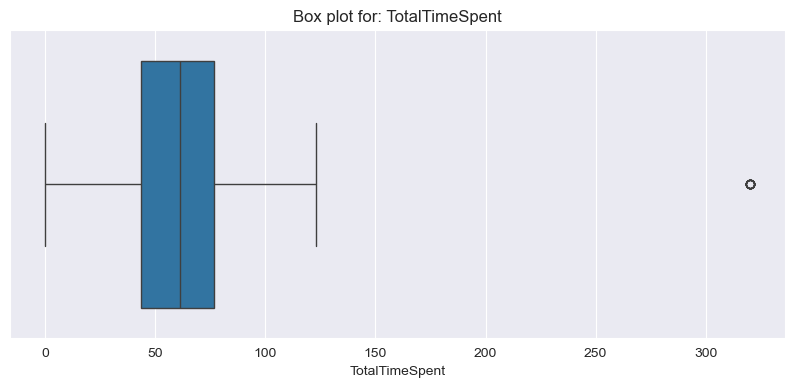

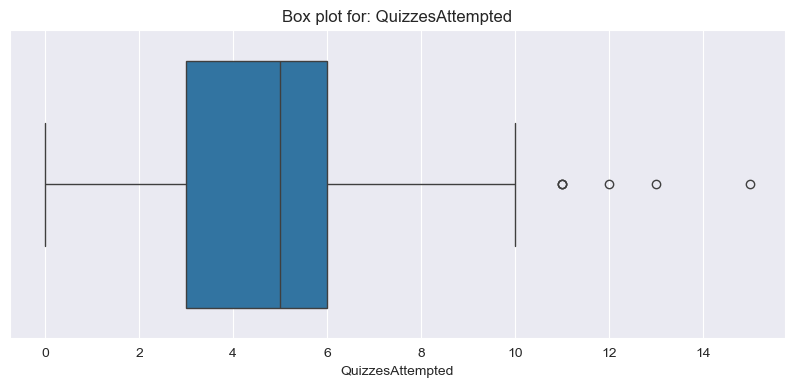

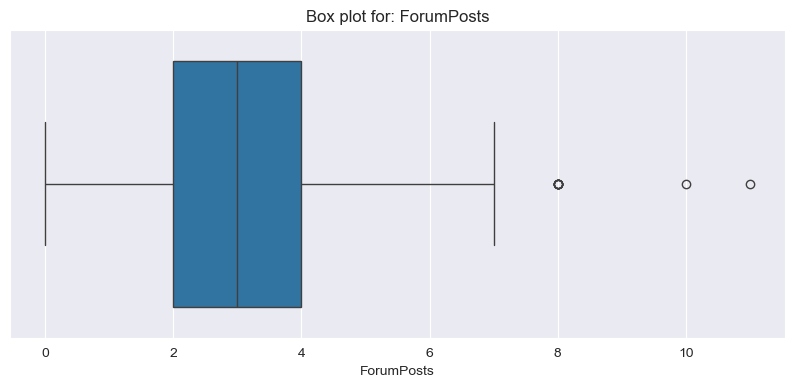

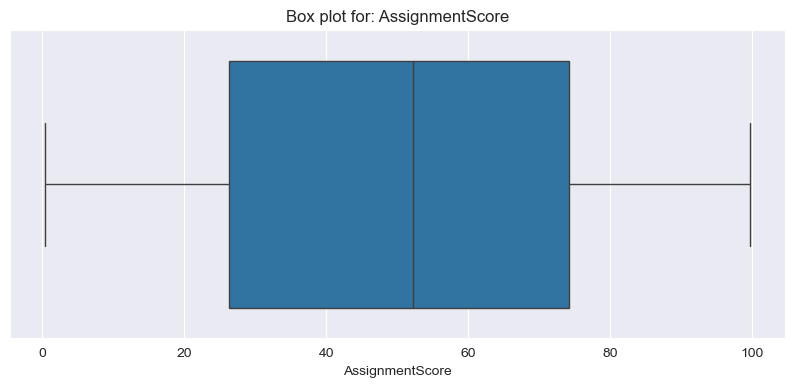

In [327]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot for: {col}')
    plt.show()

<div dir="rtl" style="border-right: 4px solid #dc3545; padding: 16px; margin-top: 16px; font-family: Vazirmatn, sans-serif;">
  <h4 style="margin-top: 0; color: #b22222;">تحلیل داده‌های پرت (Outlier Analysis)</h4>
  <hr>
  <p>
    با توجه به تحلیل نمودارهای جعبه‌ای (Box Plots)، داده‌های پرت به وضوح در ستون‌های زیر شناسایی شدند:
  </p>
  <ul style="list-style-type: square; padding-right: 20px;">
    <li><code>TotalTimeSpent</code></li>
    <li><code>QuizzesAttempted</code></li>
    <li><code>ForumPosts</code></li>
  </ul>
  <p>
    این ستون‌ها مقادیری را دارند که از توزیع عمومی داده‌ها فاصله دارند.
  </p>
</div>

In [328]:
int(df.duplicated().sum())

0

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1>
<h3>وظیفه 3:</h3>

تبدیل ستون متنی به مقادیر عددی

1- روش شما برای انجام اینکار چیست و دلیلش؟؟
<br>
</div>

In [329]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CourseName         485 non-null    category
 1   TotalTimeSpent     485 non-null    float64 
 2   QuizzesAttempted   485 non-null    int64   
 3   ForumPosts         485 non-null    int64   
 4   AssignmentScore    485 non-null    float64 
 5   CertificateEarned  485 non-null    category
 6   DeviceType         485 non-null    category
dtypes: category(3), float64(2), int64(2)
memory usage: 20.8 KB


,CourseName,TotalTimeSpent,QuizzesAttempted,ForumPosts,AssignmentScore,CertificateEarned,DeviceType
0,Data Prep,93.0,2,7,86.2,Yes,Mobile
1,ML Basics,78.2,7,3,83.9,No,Mobile
2,ML Basics,64.0,5,2,65.3,Yes,Mobile
3,Data Prep,21.7,5,6,50.2,No,Mobile
4,Data Prep,56.3,5,5,72.1,Yes,Mobile


In [330]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

df_transformed_array = preprocessor.fit_transform(df)

new_column_names = preprocessor.get_feature_names_out()

df_final = pd.DataFrame(df_transformed_array, columns=new_column_names)

print(df_final.head())


# Or we can use this way:

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

   cat__CourseName_DL Advanced  cat__CourseName_Data Prep  \
0                          0.0                        1.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        1.0   
4                          0.0                        1.0   

   cat__CourseName_ML Basics  cat__CertificateEarned_Yes  \
0                        0.0                         1.0   
1                        1.0                         0.0   
2                        1.0                         1.0   
3                        0.0                         0.0   
4                        0.0                         1.0   

   cat__DeviceType_Mobile  cat__DeviceType_Tablet  remainder__TotalTimeSpent  \
0                     1.0                     0.0                       93.0   
1                     1.0                     0.0                       78.2   
2                     1.0       

,TotalTimeSpent,QuizzesAttempted,ForumPosts,AssignmentScore,CourseName_DL Advanced,CourseName_Data Prep,CourseName_ML Basics,CertificateEarned_Yes,DeviceType_Mobile,DeviceType_Tablet
0,93.0,2,7,86.2,False,True,False,True,True,False
1,78.2,7,3,83.9,False,False,True,False,True,False
2,64.0,5,2,65.3,False,False,True,True,True,False
3,21.7,5,6,50.2,False,True,False,False,True,False
4,56.3,5,5,72.1,False,True,False,True,True,False


<div dir="rtl" style="border-right: 4px solid #198754; padding: 16px; margin-top: 16px; font-family: Vazirmatn, sans-serif; text-align: right;">

  <h3 style="margin-top: 0; color: #b22222;">تبدیل ستون‌های متنی به مقادیر عددی</h3>
  <hr>

  <p>
    برای تبدیل داده‌های متنی (دسته‌ای) به فرمت عددی، ابتدا باید نوع داده را تشخیص دهیم. انتخاب روش به طور مستقیم به این بستگی دارد که آیا دسته‌ها دارای <strong>ترتیب منطقی</strong> هستند یا خیر.
  </p>

  <div style="margin-top: 20px;">
    <h5 style="color: #0d6efd;">روش اول: کدگذاری وان-هات (One-Hot Encoding)</h5>
    <blockquote style="margin: 0; padding-right: 12px; border-right: 2px solid #ced4da;">
      <p>
        <strong>برای داده‌های اسمی (Nominal):</strong> دسته‌هایی که هیچ ترتیب یا برتری ذاتی نسبت به هم ندارند (مانند <code>CourseName</code> یا <code>DeviceType</code>).
      </p>
      <p>
        <strong>روش کار:</strong> این روش برای هر مقدار منحصر به فرد در ستون، یک ستون جدید باینری (۰ یا ۱) ایجاد می‌کند.
      </p>
      <p>
        <strong>دلیل انتخاب:</strong> این امن‌ترین راه است زیرا از ایجاد یک رابطه عددی <strong>اشتباه و مصنوعی</strong> بین دسته‌ها جلوگیری می‌کند. مدل به اشتباه یاد نمی‌گیرد که یک دسته از دیگری "مهم‌تر" است.
      </p>
    </blockquote>
  </div>

  <div style="margin-top: 20px;">
    <h5 style="color: #6f42c1;">روش دوم: کدگذاری ترتیبی (Ordinal Encoding)</h5>
    <blockquote style="margin: 0; padding-right: 12px; border-right: 2px solid #ced4da;">
      <p>
        <strong>برای داده‌های ترتیبی (Ordinal):</strong> دسته‌هایی که ترتیب منطقی دارند (مانند سطح تحصیلات: "لیسانس"، "فوق لیسانس"، "دکترا").
      </p>
      <p>
        <strong>روش کار:</strong> به هر دسته یک عدد صحیح منحصر به فرد بر اساس ترتیب آن اختصاص می‌دهد (مثلاً: لیسانس=۱، فوق لیسانس=۲، دکترا=۳).
      </p>
      <p>
        <strong>دلیل انتخاب:</strong> این روش <strong>رابطه ترتیبی و معنادار</strong> موجود در داده‌ها را حفظ می‌کند که این خود می‌تواند یک سیگنال بسیار مهم برای مدل یادگیری ماشین باشد.
      </p>
    </blockquote>
  </div>
  
  <div style="margin-top: 20px;">
    <h3 style="color: #358121;">نتیجه (Ordinal Encoding)</h3>
    <blockquote style="margin: 0; padding-right: 12px; border-right: 2px solid #ced4da;">
      <p>
      در اینجا ما از One-Hot Encoding استفاده می کنیم چون داده هایی که داریم ترتیب در آن ها مهم نیست.
      </p>
    </blockquote>
  </div>

</div>

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1>
<h3>وظیفه 4:</h3>

ساخت ویژگی جدیدی به نام EngagementScore بر اساس مجموع زمان، تعداد پست و نمره تمرین.
<br>
</div>

In [331]:
from sklearn.preprocessing import MinMaxScaler

cols_for_score = ['TotalTimeSpent', 'ForumPosts', 'AssignmentScore']
features = df[cols_for_score]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

df['EngagementScore'] = scaled_features.sum(axis=1)
df.head()

,TotalTimeSpent,QuizzesAttempted,ForumPosts,AssignmentScore,CourseName_DL Advanced,CourseName_Data Prep,CourseName_ML Basics,CertificateEarned_Yes,DeviceType_Mobile,DeviceType_Tablet,EngagementScore
0,93.0,2,7,86.2,False,True,False,True,True,False,1.791037
1,78.2,7,3,83.9,False,False,True,False,True,False,1.357988
2,64.0,5,2,65.3,False,False,True,True,True,False,1.035393
3,21.7,5,6,50.2,False,True,False,False,True,False,1.114778
4,56.3,5,5,72.1,False,True,False,True,True,False,1.352537


<div dir="rtl" style="border-right: 4px solid #0d6efd; padding: 16px; margin-top: 16px; font-family: Vazirmatn, sans-serif; text-align: right;">

  <h4 style="margin-top: 0; color: #b22222;">توجیه روش: چرا برای ساخت `EngagementScore` از مقیاس‌بندی استفاده کردیم؟</h4>
  <hr>

  <p>
    ما از روش **مقیاس‌بندی و سپس جمع** استفاده کردیم، زیرا جمع کردن مستقیم مقادیر ستون‌ها یک روش **نادرست و گمراه‌کننده** بود.
  </p>

  <blockquote style="margin: 0; padding-right: 12px; border-right: 2px solid #ced4da;">
    <h5 style="color: #dc3545;">مشکل روش جمع مستقیم:</h5>
    <p>
      ستون‌های <code>TotalTimeSpent</code>، <code>ForumPosts</code> و <code>AssignmentScore</code> دارای <strong>مقیاس‌های بسیار متفاوتی</strong> هستند. اگر این مقادیر را مستقیماً جمع می‌کردیم، ستونی که اعداد بزرگ‌تری دارد (مانند <code>TotalTimeSpent</code>) بر نتیجه نهایی غلبه می‌کرد و تأثیر دو ستون دیگر تقریباً نادیده گرفته می‌شد. این کار منجر به یک امتیاز نامتعادل می‌شد که به درستی میزان تعامل کاربر را نشان نمی‌داد.
    </p>
  </blockquote>

  <div style="margin-top: 16px;">
    <h5 style="color: #198754;">راه حل صحیح (روش استفاده شده):</h5>
    <p>
      با استفاده از <code>MinMaxScaler</code>، ما ابتدا تمام این سه ویژگی را به یک مقیاس یکسان (بین ۰ تا ۱) آوردیم. این کار تضمین می‌کند که هر سه فعالیت به یک اندازه در امتیاز نهایی مشارکت داشته باشند و یک <strong>معیار منصفانه و دقیق</strong> از تعامل کاربر به دست آید.
    </p>
  </div>

</div>

<div style="direction: rtl; text-align: right; font-family: Tahoma, sans-serif;">
<h1></h1>
<h2></h2>
<h3>وظیفه 5:</h3>
اگر نوع تایپ ستون هارو فیکس نکردین ابتدا فیکس و سپس
ذخیره فایل نهایی با نام `cleaned_students.csv`.
<br>
</div>

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TotalTimeSpent          485 non-null    float64
 1   QuizzesAttempted        485 non-null    int64  
 2   ForumPosts              485 non-null    int64  
 3   AssignmentScore         485 non-null    float64
 4   CourseName_DL Advanced  485 non-null    bool   
 5   CourseName_Data Prep    485 non-null    bool   
 6   CourseName_ML Basics    485 non-null    bool   
 7   CertificateEarned_Yes   485 non-null    bool   
 8   DeviceType_Mobile       485 non-null    bool   
 9   DeviceType_Tablet       485 non-null    bool   
 10  EngagementScore         485 non-null    float64
dtypes: bool(6), float64(3), int64(2)
memory usage: 25.6 KB


In [333]:
bool_columns = df.select_dtypes(include='bool').columns

df[bool_columns] = df[bool_columns].astype(int)

In [334]:
df.to_csv('cleaned_students.csv', index=False, encoding='utf-8-sig')